In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as sm
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
data_hypo2 = pd.read_csv('./Data/cleaned_hypo2.csv')

# Hypothesis 2 (Vaccination rates)

### "We believe there is a connection between a country's population density and the number of COVID-19 cases, where higher population density correlates with more COVID-19 cases. That is to say, countries with more cases also had higher vaccination coverage."

We've chosen to show 'total_vaccinations_per_hundred' through a histogram. The histogram shows us a visual representation of the data throughout the whole world. 

c:\Users\Cat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


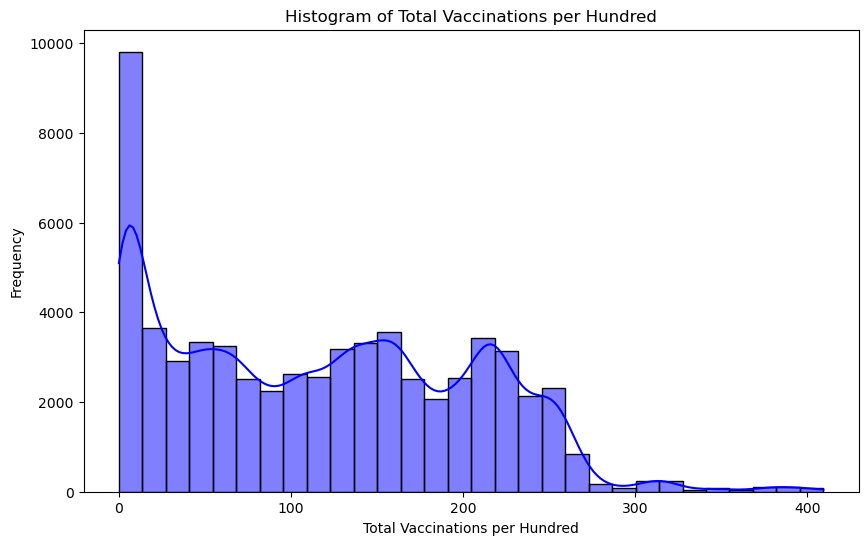

In [4]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_hypo2['total_vaccinations_per_hundred'], kde=True, color='blue', bins=30)
plt.title('Histogram of Total Vaccinations per Hundred')
plt.xlabel('Total Vaccinations per Hundred')
plt.ylabel('Frequency')
plt.show()

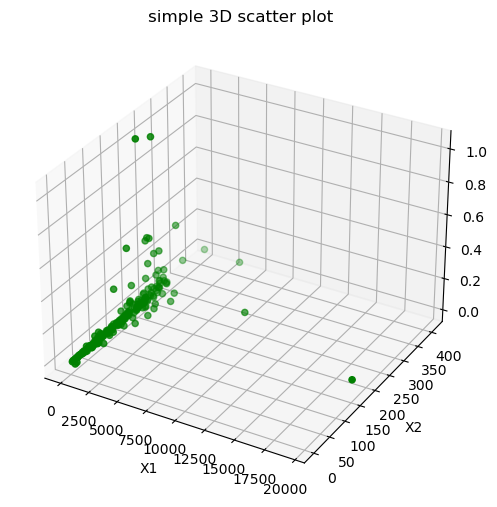

In [5]:
last_row_subset = data_hypo2.groupby('location').last().reset_index()
#Creating figure
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(projection='3d')
#Creating plot
ax.scatter3D( last_row_subset['population_density'], last_row_subset['total_vaccinations_per_hundred'], last_row_subset['total_cases'], color = "green")
plt.title("simple 3D scatter plot")
plt.grid()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [6]:
fig = px.scatter_3d(last_row_subset, x="population_density", y="total_vaccinations_per_hundred", z='total_cases', color="population_density", size='total_vaccinations_per_hundred', size_max=40, opacity=0.8)
fig.show()

Moving on from our histogram of the world, we decided to dwelve into more specific countries; the nordics. 

We want to show the volume of both the vaccines and cases per hundred people. So first we prepare our data and arrange it properly in the dataset.

In [7]:
# List of Nordic countries
nordic_countries = ['Denmark', 'Norway', 'Sweden', 'Finland', 'Greenland']

# Copy the necessary columns to the hypothesis 2 dataframe
data_hypothesis_2 = data_hypo2[['location', 'total_cases', 'total_vaccinations_per_hundred', 'population_density', 'date']]

# Create empty dictionaries to store data for each Nordic country
nordic_data = {}

# Iterate over each Nordic country and extract the data
for country in nordic_countries:
    nordic_data[country] = data_hypothesis_2[data_hypothesis_2['location'] == country]

# Check the data for each Nordic country
for country, country_data in nordic_data.items():
    print(f"{country} data:")
    print(country_data.head())



Denmark data:
      location  total_cases  total_vaccinations_per_hundred  \
17113  Denmark     107116.0                            0.00   
17114  Denmark     131606.0                            0.00   
17115  Denmark     151167.0                            0.09   
17116  Denmark     167541.0                            1.56   
17117  Denmark     180240.0                            2.32   

       population_density        date  
17113              136.52  2020-12-18  
17114              136.52  2020-12-25  
17115              136.52  2021-01-01  
17116              136.52  2021-01-08  
17117              136.52  2021-01-15  
Norway data:
      location  total_cases  total_vaccinations_per_hundred  \
44079   Norway      35999.0                             0.0   
44080   Norway      38491.0                             0.0   
44081   Norway      38491.0                             0.0   
44082   Norway      38491.0                             0.0   
44083   Norway      38491.0            

In [8]:
# Copy the necessary columns to the hypothesis 2 dataframe
data_hypothesis_2 = data_hypo2[['location', 'total_cases', 'total_vaccinations_per_hundred', 'population_density', 'date']]
denmark_data = data_hypothesis_2[data_hypothesis_2['location'] == 'Denmark']
norge_data = data_hypothesis_2[data_hypothesis_2['location'] == 'Norway']
sweden_data = data_hypothesis_2[data_hypothesis_2['location'] == 'Sweden']
finland_data = data_hypothesis_2[data_hypothesis_2['location'] == 'Finland']
greenland_data = data_hypothesis_2[data_hypothesis_2['location'] == 'Greenland']
# Check the data to see if it looks good
print(data_hypothesis_2.head())

      location  total_cases  total_vaccinations_per_hundred  \
0  Afghanistan      55604.0                            0.00   
1  Afghanistan      55714.0                            0.02   
2  Afghanistan      55985.0                            0.13   
3  Afghanistan      56676.0                            0.29   
4  Afghanistan      57793.0                            0.58   

   population_density        date  
0              54.422  2021-02-22  
1              54.422  2021-02-28  
2              54.422  2021-03-16  
3              54.422  2021-04-07  
4              54.422  2021-04-22  


In [9]:
data_hypothesis_2.isnull().sum()

location                          0
total_cases                       0
total_vaccinations_per_hundred    0
population_density                0
date                              0
dtype: int64

Remove rows with missing values in the 'total_cases' column

In [10]:
data_hypothesis_2.dropna(subset=['total_cases'], inplace=True)


C:\Users\Cat\AppData\Local\Temp\ipykernel_3008\1979015792.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
data_hypothesis_2.describe()

,total_cases,total_vaccinations_per_hundred,population_density
count,6.304800e+04,63048.000000,63048.000000
mean,4.457535e+06,117.484288,297.593433
std,1.126166e+07,86.095723,950.546467
min,1.000000e+00,0.000000,0.000000
25%,1.293070e+05,38.090000,35.608000
50%,7.282660e+05,115.020000,96.254000
75%,3.854354e+06,188.852500,231.447000
max,1.033436e+08,409.330000,19347.500000


Get the last row for each countries latest observation

In [12]:
last_row = data_hypothesis_2.groupby('location').last().reset_index()
last_row.sample(5)

,location,total_cases,total_vaccinations_per_hundred,population_density,date
179,Suriname,80240.0,81.82,3.612,2022-05-23
136,Nicaragua,15713.0,223.18,51.667,2023-08-11
17,Belarus,994037.0,236.09,46.858,2023-09-03
201,Vanuatu,12014.0,112.21,22.662,2023-02-20
95,Italy,26298647.0,244.94,205.859,2023-11-16


In [13]:

last_row = data_hypothesis_2.groupby('location').last().reset_index()
last_row.sample(5)

,location,total_cases,total_vaccinations_per_hundred,population_density,date
106,Lebanon,1221640.0,105.92,594.561,2022-12-22
125,Montenegro,232624.0,108.31,46.280,2022-08-26
41,China,98637553.0,244.84,147.674,2023-02-09
88,India,45028053.0,155.72,450.419,2024-02-18
114,Malawi,88960.0,41.68,197.519,2023-09-24


After this is done, we're creating our first visual: a bar plot to show total vaccinations per hundred in the nordics.

Next up is a scatterplot, to explore the relationships between our variables.

First up, we show a scatterplot showing how many covid-cases happened over time.

In [14]:
# Filtrer dataene kun for nordic_countries
nordic_data = data_hypothesis_2[data_hypothesis_2['location'].isin(nordic_countries)]

# Opret et scatterplot med plotly
fig = px.scatter(nordic_data, x='date', y='total_cases', color='location', hover_name='location',
                 labels={'date': 'Date', 'total_cases': 'Total COVID-19 Cases'},
                 title='Relationship between COVID-19 Cases and the timeperiod 2020-2024 in the Nordic Countries')

# Vis plottet
fig.show()

c:\Users\Cat\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Then we show a scatterplot showing how many vaccinations per hundred happened over time.

Test til MARCUS

In [15]:
# Filtrer dataene kun for nordic_countries
nordic_data = data_hypothesis_2[data_hypothesis_2['location'].isin(nordic_countries)]

# Opret et scatterplot med plotly
fig = px.scatter(nordic_data, x='date', y='total_vaccinations_per_hundred', color='location', hover_name='location',
                 labels={'date': 'Date', 'total_vaccinations_per_hundred': 'Vaccinations per Hundred'},
                 title='Relationship between Vaccination Coverage and the timeperiod 2020-2024 in the Nordic Countries')

# Vis plottet
fig.show()

c:\Users\Cat\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



With these two plots, we can piece things a bit more together. All countries had a pretty slow start, but increased their vaccine coverage as more cases happened. 



In [16]:
# filtrere data_hypothesis_2 for kun nordiske lande
data_hypothesis_2_subset = data_hypothesis_2[data_hypothesis_2['location'].isin(nordic_countries)]

# De nordiske lande med det højeste gennemsnitlige antal sager for vaccinationsdækning per hundred
top_5_nordic_countries = data_hypothesis_2_subset[data_hypothesis_2_subset['location'].isin(nordic_countries)].groupby('location')['total_vaccinations_per_hundred'].mean().nlargest(5).index

# subset af data, der kun indeholder de nordiske lande med det højeste gennemsnitlige antal sager for vaccinationsdækning per hundred
top_5_nordic_data = data_hypothesis_2_subset.sort_values('total_vaccinations_per_hundred', ascending=True)
# søjlediagram med plotly for de nordiske lande med farvefulde søjler baseret på total_cases
fig = px.bar(top_5_nordic_data, x='location', y='total_vaccinations_per_hundred', color='total_cases',
             labels={'total_vaccinations_per_hundred': 'Gennemsnitlig vaccinationsdækning per hundrede', 'location': 'Land'},
             title='Top 5 nordiske lande med det højeste gennemsnitlige antal sager for vaccinationsdækning per hundrede')

# Vis plottet
fig.show()
#test til 

In this histogram, we can see how many cases happened per observation in the nordic countries.

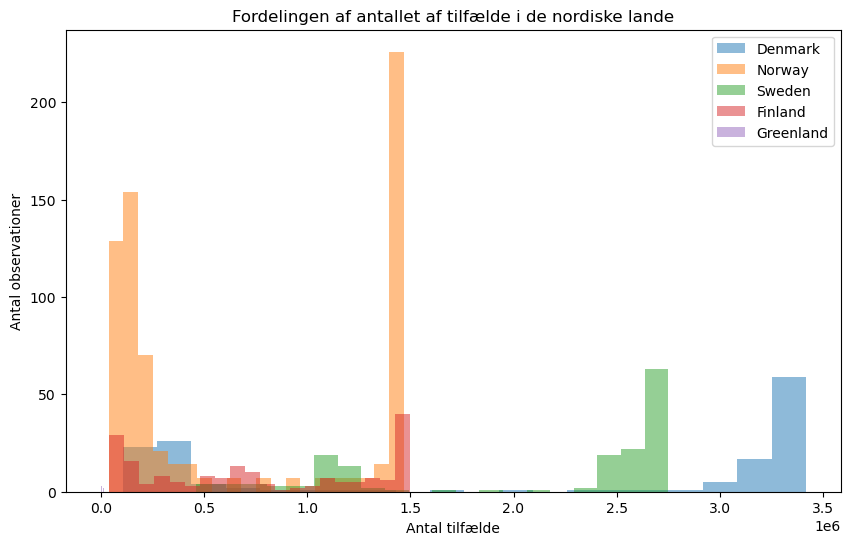

In [17]:
# histogram for total_cases i de nordiske lande
plt.figure(figsize=(10, 6))
for country in nordic_countries:
    country_data = data_hypothesis_2_subset[data_hypothesis_2_subset['location'] == country]
    plt.hist(country_data['total_cases'], bins=20, alpha=0.5, label=country)

plt.title('Fordelingen af antallet af tilfælde i de nordiske lande')
plt.xlabel('Antal tilfælde')
plt.ylabel('Antal observationer')
plt.legend()
plt.show()

In [18]:
# -liste over funktionernes navne
feature_cols = ['total_vaccinations_per_hundred', 'total_cases']

# Brug listen til at vælge en undermængde af det oprindelige datasæt kun for nordiske lande
X = data_hypo2[data_hypo2['location'].isin(nordic_countries)][feature_cols]

# Udskriv y for at forstå dens form
print(y)

# Udskriv X
print(X)

NameError: name 'y' is not defined

We've then made a Heatmap to show the pairwise correlation coefficients between our variables.

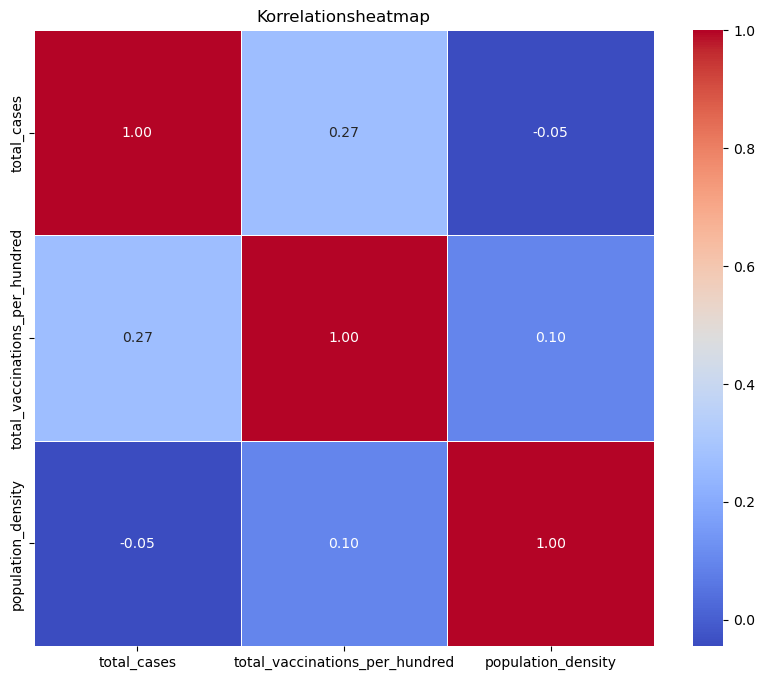

In [ ]:

# Filtrér datasættet for kun numeriske kolonner
numerical_data_hypo2 = data_hypo2.select_dtypes(include='number')

# Beregn korrelationskoefficienter
correlation_matrix = numerical_data_hypo2.corr()

# Lav en heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsheatmap')
plt.show()

##  Train a Model

### To demonstrate a bit of machine learning, we've decided to train a model based on total cases and total vaccinations per hundred, to follow up from visuals from above.

### We're trying to train our model to try and predict whether or not these two features relates to an increase in covid cases.

First we prepare X and Y

In [ ]:
# Opret en Series for y (total_cases) for Danmark
y = data_hypo2[data_hypo2['location'] == 'Denmark']['total_cases']

# Opret et nyt DataFrame X med de valgte funktioner (total_vaccinations_per_hundred og population_density) for Danmark
X = data_hypo2[data_hypo2['location'] == 'Denmark'][['total_vaccinations_per_hundred']]

# Opret et nyt X-dataframe kun med nordiske lande
X =  X[X.index.isin(y.index)]

print(X.head())

       total_vaccinations_per_hundred
86290                            0.00
86297                            0.00
86304                            0.09
86311                            1.56
86318                            2.32


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109, 1)
(109,)
(37, 1)
(37,)


Linear regression

In [ ]:
# Opret en model
linreg = LinearRegression()

# Tilpas modellen til vores træningsdata
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = -463333.20610529557
bi = [14278.71200142]


In [ ]:
# Denne kode kombinerer navnene på funktionerne med deres tilsvarende koefficienter ved hjælp af zip
list(zip(feature_cols, linreg.coef_))

[('total_vaccinations_per_hundred', 14278.712001424059)]

### Testing the Model

In [ ]:
y_predicted = linreg.predict(X_test)
y_predicted

array([3101632.81929025, 2679696.87964817, 2322443.50537254,
       2690548.70076925, 3166600.95889673, 2689549.19092915,
       3166600.95889673, 3166743.74601674, 1671191.45098759,
       2642001.07996441, -422924.45114127, -179900.77287703,
       2703542.32869055, -241870.38296321, 3071361.94984723,
       1353204.53471587, 3166743.74601674,  936408.9313943 ,
       3166743.74601674, 1505558.39177107, 2688264.10684902,
       2698687.56661006, 1183573.43613896, 3166600.95889673,
       1782137.04323865,  -15552.79774064, 3166886.53313676,
       3166458.17177671, 2716250.38237181, 2693690.01740956,
       3166743.74601674, 1985608.68925894, 1636208.6065841 ,
       3163745.21649644,  812469.71122194, 1616075.62266209,
       3158033.73169587])

### Model Evaluation Metrics

In [ ]:
# Den beregnede værdi, som du får, er det gennemsnitlige absolutte fejl (Mean Absolute Error - MAE) mellem de faktiske salgsværdier (y_test) og de forudsagte salgsværdier (y_predicted).
print(metrics.mean_absolute_error(y_test, y_predicted))

608541.6743717458


In [ ]:
# beregner gennemsnittet af de kvadrerede forskelle mellem de faktiske og forudsagte værdier.
print(metrics.mean_squared_error(y_test, y_predicted))

560913608778.2681


In [ ]:
# RMSE tager kvadratroden af MSE for at give os en værdi, der er på samme skala som den oprindelige responsvariabel.
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

748941.6591285786


In [ ]:
# R-squared
r2_score(y_test, y_predicted)

0.7338965628971608

In [ ]:
linreg.score(X_test, y_test)

0.7338965628971608

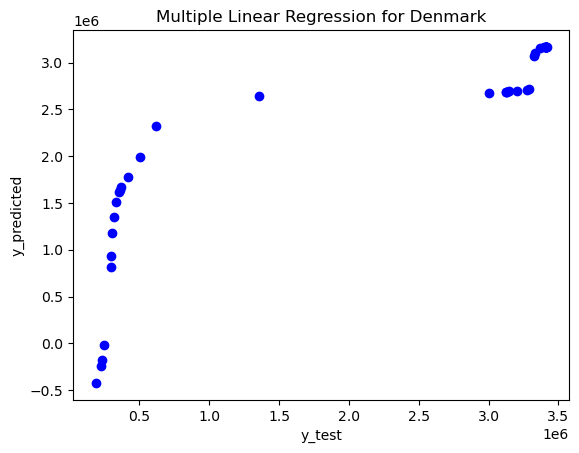

In [ ]:
# Visualise the regression results
plt.title('Multiple Linear Regression for Denmark')
plt.scatter(y_test, y_predicted, color='blue')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.show()


Resultatet af hypotese 2-analysen viser en r2_score-værdi på 0.02203030.... Denne værdi indikerer, at den lineære model, der blev anvendt til at undersøge sammenhængen mellem befolkningstæthed, antallet af COVID-19-tilfælde og vaccinationsdækning per hundrede, ikke passer godt til dataene. En lav r2_score-værdi antyder, at andre faktorer ud over befolkningstæthed og vaccinationsdækning sandsynligvis spiller en væsentlig rolle i antallet af COVID-19-tilfælde. Derfor kan vi ikke konkludere, at der er en stærk sammenhæng mellem disse variabler baseret på denne analyse alene. Yderligere undersøgelser eller inkludering af andre faktorer kan være nødvendige for at opnå et mere præcist resultat.